# Loan Prediction

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [74]:
import warnings
warnings.simplefilter('ignore')

In [75]:
train = pd.read_csv('train.csv')

In [76]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Exploratory Data Analysis. Data Exploration and Preparation.

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outliter treatment
6. Variable transformation
7. Variable creation

### 1. Variable Identification

1. Identify predictor and target variables;
2. Identify data type of the variables;
3. Identify category of the variables.

In [78]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [79]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### 1. Identify predictor and target variables.

**Predictor variables.**

* Gender
* Married
* Dependents
* Education
* Self_Employed
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* Loan_Amount_Term
* Credit_History
* Property_Area

**Target variable.**

* Loan_Status

#### 2. Identify data type of the variables.

**Character.**

* Gender
* Married
* Education
* Self_Employed
* Property_Area
* Loan_Status

**Numeric.**

* Dependents
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* Loan_Amount_Term
* Credit_History

#### 3. Identify categories of the variables.

**Categorical.**

* Gender
* Married
* Education
* Self_Employed
* Property_Area
* Loan_Status
* Dependents
* Credit_History
* Loan_Amount_Term

**Continuous.**

* ApplicantIncome
* CoapplicantIncome
* LoanAmount

## 2. Univariate Analysis

In [80]:
continuous_variables = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categorical_variables = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status',
                         'Dependents', 'Credit_History']

### Continuous Variables

In [81]:
train[continuous_variables].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


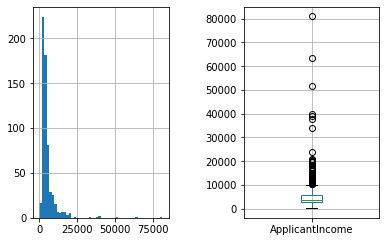

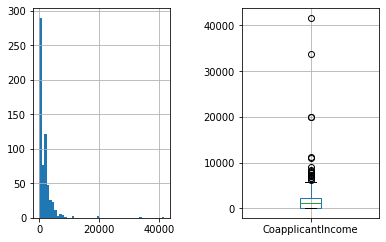

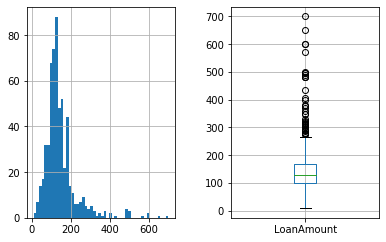

In [82]:
for continuous in continuous_variables: 
    plt.subplot(1, 2, 1);
    train[continuous].hist(bins=50);
    plt.subplot(1, 2, 2);
    train.boxplot(column=[continuous]);
    plt.tight_layout(pad=3.0)
    plt.show()

### Categorical Variables

In [83]:
def analyze_categorical(variable, df):
    counts = pd.concat((df[variable].value_counts(), df[variable].value_counts(normalize=True)), 
              axis=1, keys=('Counts', 'Percentage'))
    print(counts)
    df[variable].value_counts().plot.bar()
    plt.show()

        Counts  Percentage
Male       489    0.813644
Female     112    0.186356


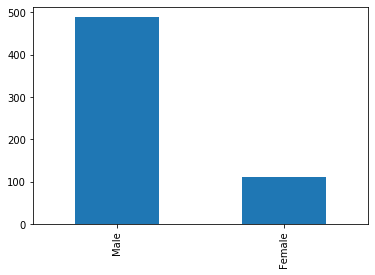

In [84]:
analyze_categorical('Gender', train)

For Gender
        Counts  Percentage
Male       489    0.813644
Female     112    0.186356


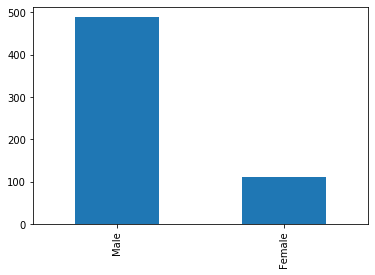

For Married
     Counts  Percentage
Yes     398    0.651391
No      213    0.348609


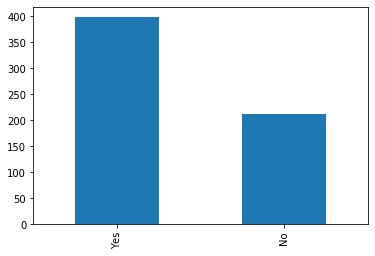

For Education
              Counts  Percentage
Graduate         480    0.781759
Not Graduate     134    0.218241


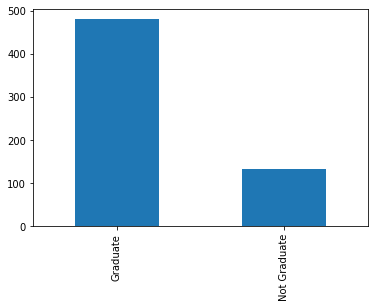

For Self_Employed
     Counts  Percentage
No      500    0.859107
Yes      82    0.140893


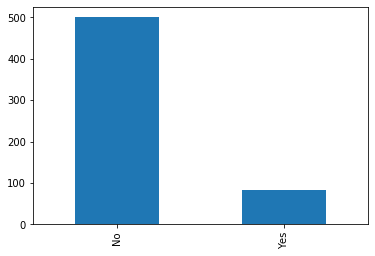

For Property_Area
           Counts  Percentage
Semiurban     233    0.379479
Urban         202    0.328990
Rural         179    0.291531


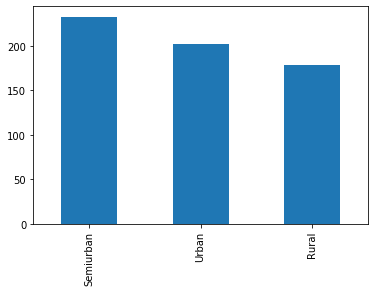

For Loan_Status
   Counts  Percentage
Y     422    0.687296
N     192    0.312704


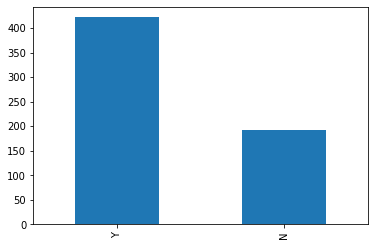

For Dependents
    Counts  Percentage
0      345    0.575960
1      102    0.170284
2      101    0.168614
3+      51    0.085142


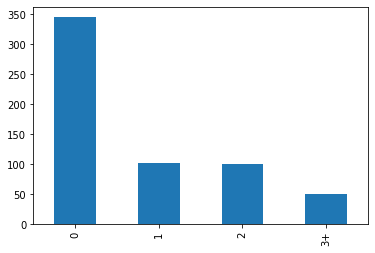

For Credit_History
     Counts  Percentage
1.0     475    0.842199
0.0      89    0.157801


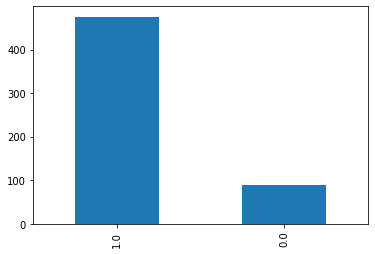

In [85]:
for variable in categorical_variables:
    print(f'For {variable}')
    analyze_categorical(variable, train)

In [86]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

## 3. Bivariate Analysis

Strategy for each combination of variable categories.

* Continuous and continuous. Scatter plot and correlation.
* Categorical and categorical. Stacked column chart and chi-square test.
* Categorical and continuous. Box plot and Z-test, T-test or ANOVA.

### Continuous and continuous

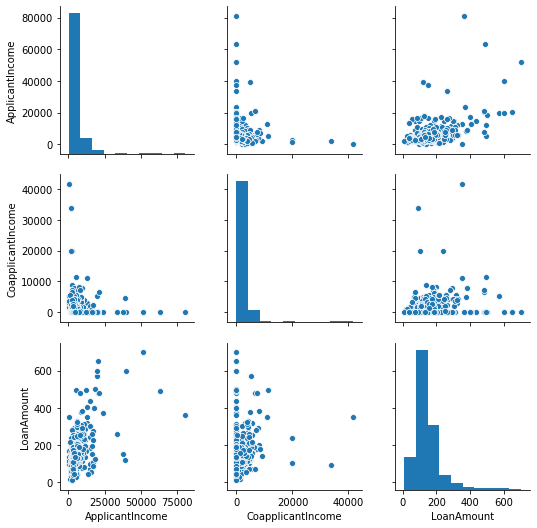

In [87]:
sns.pairplot(train[continuous_variables]);

#### Correlation

[Consulted link](https://www.geeksforgeeks.org/python-pandas-dataframe-corr/)

In [88]:
train[continuous_variables].corr(method="pearson")

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.570909
CoapplicantIncome,-0.116605,1.000000,0.188619
LoanAmount,0.570909,0.188619,1.000000


### Categorical and categorical

In [89]:
def generate_two_way_data(cat1, cat2, df):
    gender_table = pd.crosstab(index=df[cat1],
                               columns=df[cat2],
                               normalize="index")
    print(gender_table)
    gender_table.plot(kind="bar", figsize=(4,4), stacked=False);
    plt.show();

In [90]:
gender_table = pd.crosstab(index=train['Loan_Status'],
                           columns=train['Gender'])
gender_table

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


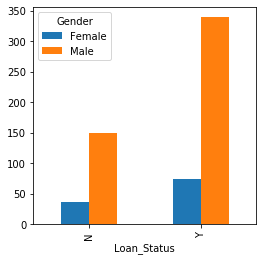

In [91]:
gender_table.plot(kind="bar", figsize=(4,4), stacked=False);

Married            No       Yes
Loan_Status                    
N            0.411458  0.588542
Y            0.319809  0.680191


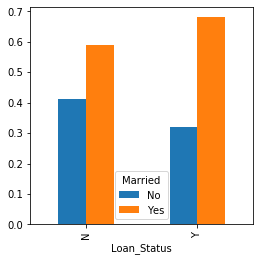

In [92]:
generate_two_way_data('Loan_Status', 'Married', train)

Education    Graduate  Not Graduate
Loan_Status                        
N            0.729167      0.270833
Y            0.805687      0.194313


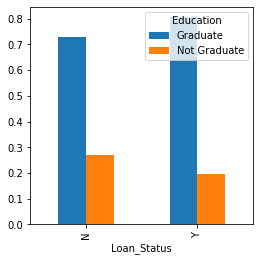

In [93]:
generate_two_way_data('Loan_Status', 'Education', train)

Self_Employed        No       Yes
Loan_Status                      
N              0.857923  0.142077
Y              0.859649  0.140351


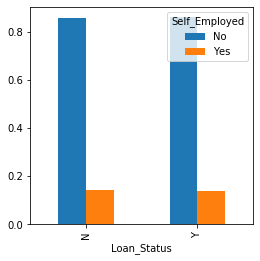

In [94]:
generate_two_way_data('Loan_Status', 'Self_Employed', train)

Property_Area     Rural  Semiurban     Urban
Loan_Status                                 
N              0.359375   0.281250  0.359375
Y              0.260664   0.424171  0.315166


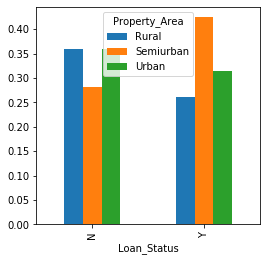

In [95]:
generate_two_way_data('Loan_Status', 'Property_Area', train)

Dependents          0         1         2        3+
Loan_Status                                        
N            0.575269  0.193548  0.134409  0.096774
Y            0.576271  0.159806  0.184019  0.079903


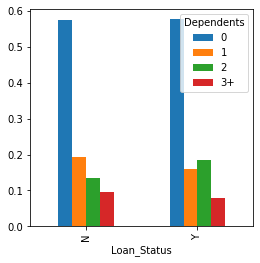

In [96]:
generate_two_way_data('Loan_Status', 'Dependents', train)

Credit_History       0.0       1.0
Loan_Status                       
N               0.458101  0.541899
Y               0.018182  0.981818


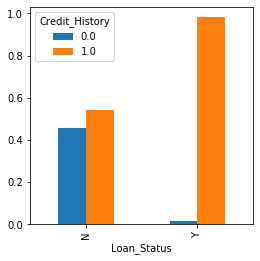

In [97]:
generate_two_way_data('Loan_Status', 'Credit_History', train)

Loan_Amount_Term     12.0      36.0      60.0      84.0      120.0     180.0  \
Loan_Status                                                                    
N                 0.000000  0.010753  0.000000  0.005376  0.000000  0.080645   
Y                 0.002415  0.000000  0.004831  0.007246  0.007246  0.070048   

Loan_Amount_Term     240.0     300.0     360.0     480.0  
Loan_Status                                               
N                 0.005376  0.026882  0.822581  0.048387  
Y                 0.007246  0.019324  0.867150  0.014493  


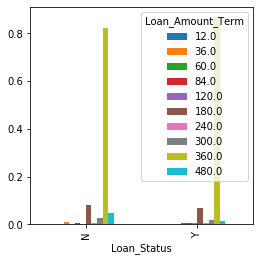

In [98]:
generate_two_way_data('Loan_Status', 'Loan_Amount_Term', train)

#### Chi-squared test

[Consulted link](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

In [99]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table
table = np.array(gender_table)
print(table)

stat, p, dof, expected = chi2_contingency(table)
print("dof=%d" % dof)
print(expected)

# interpret test statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print("probability=%.3f, critical=%.3f, stat=%.3f" % (prob, critical, stat))

if abs(stat) >= critical:
    print("Dependent (reject H0)")
else:
    print("Independent (failt to reject H0)")
    
# interpret p-value
alpha = 1.0 - prob
print("significance=%.3f, p=%.3f" % (alpha, p))
if p <= alpha:
    print("Dependent (reject H0)")
else:
    print("Independent (failt to reject H0)")

[[ 37 150]
 [ 75 339]]
dof=1
[[ 34.84858569 152.15141431]
 [ 77.15141431 336.84858569]]
probability=0.950, critical=3.841, stat=0.140
Independent (failt to reject H0)
significance=0.050, p=0.709
Independent (failt to reject H0)


In [100]:
def report_chi_squared_test(cat1, cat2, df):
    # calculate contingency table for the two categorical variables
    table = pd.crosstab(index=df[cat1],
                           columns=df[cat2])
    stat, p, dof, expected = chi2_contingency(table)
    # interpret test statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print("probability=%.3f, critical=%.3f, stat=%.3f" % (prob, critical, stat))

    if abs(stat) >= critical:
        print("Dependent (reject H0)")
    else:
        print("Independent (failt to reject H0)")

    # interpret p-value
    alpha = 1.0 - prob
    print("significance=%.3f, p=%.3f" % (alpha, p))
    if p <= alpha:
        print("Dependent (reject H0)")
    else:
        print("Independent (failt to reject H0)")

In [101]:
report_chi_squared_test('Loan_Status', 'Gender', train)

probability=0.950, critical=3.841, stat=0.140
Independent (failt to reject H0)
significance=0.050, p=0.709
Independent (failt to reject H0)


In [102]:
report_chi_squared_test('Loan_Status', 'Married', train)

probability=0.950, critical=3.841, stat=4.475
Dependent (reject H0)
significance=0.050, p=0.034
Dependent (reject H0)


Based on the results of the Chi-square test, we can observe that gender is not an important variable, while if the person is married or not is an important information.

In [103]:
report_chi_squared_test('Loan_Status', 'Credit_History', train)

probability=0.950, critical=3.841, stat=174.637
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


As observed in the frequency table, we can confirm the importance to predict the loan status given the credit history given the chi-square test.

### Categorical and continuous

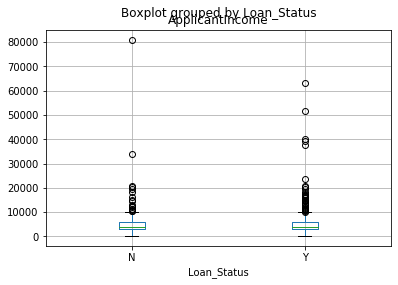

In [104]:
train.boxplot(by="Loan_Status", column=["ApplicantIncome"]);

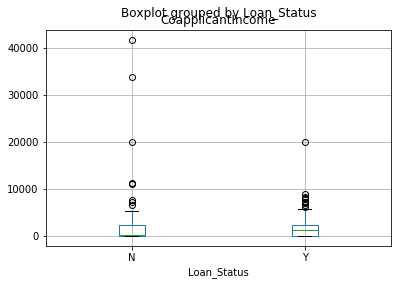

In [105]:
train.boxplot(by="Loan_Status", column=["CoapplicantIncome"]);

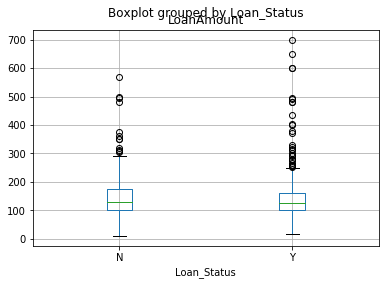

In [106]:
train.boxplot(by="Loan_Status", column=["LoanAmount"]);

## 4. Missing Values Treatment

[Consulted link](https://jamesrledoux.com/code/imputation)

In [107]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [108]:
train[categorical_variables].isnull().sum()

Gender            13
Married            3
Education          0
Self_Employed     32
Property_Area      0
Loan_Status        0
Dependents        15
Credit_History    50
dtype: int64

In [109]:
# for categorical variables, imputing considering the most common class
train[categorical_variables] = train[categorical_variables].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [110]:
train[categorical_variables].isnull().sum()

Gender            0
Married           0
Education         0
Self_Employed     0
Property_Area     0
Loan_Status       0
Dependents        0
Credit_History    0
dtype: int64

In [111]:
train[continuous_variables].isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
dtype: int64

LoanAmount is the only continuous variable with missing values. Imputation will be based on the median given integers values.

In [112]:
loan_amount_median = train['LoanAmount'].median()
loan_amount_median

128.0

In [113]:
train['LoanAmount'] = train['LoanAmount'].fillna(loan_amount_median)

In [114]:
train[continuous_variables].isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

## 5. Outlier Treatment

[Consulted link to deal with log transformation on variable with many zero values.](https://discuss.analyticsvidhya.com/t/methods-to-deal-with-zero-values-while-performing-log-transformation-of-variable/2431/2)

In [115]:
train['ApplicantIncome'] = np.log(train['ApplicantIncome']) 

In [116]:
train['CoapplicantIncome'] = np.log(train['CoapplicantIncome'] + 1)

In [117]:
train['LoanAmount'] = np.log(train['LoanAmount'])

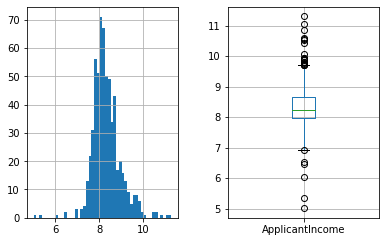

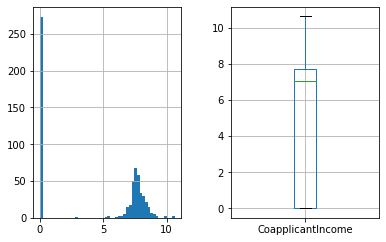

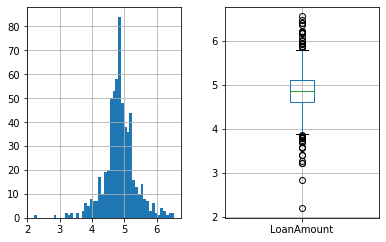

In [118]:
for continuous in continuous_variables: 
    plt.subplot(1, 2, 1);
    train[continuous].hist(bins=50);
    plt.subplot(1, 2, 2);
    train.boxplot(column=[continuous]);
    plt.tight_layout(pad=3.0)
    plt.show()

## 6. Feature Engineering

In [119]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [120]:
continuous_variables.append('TotalIncome')

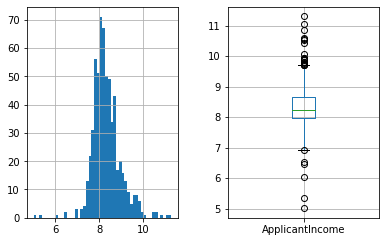

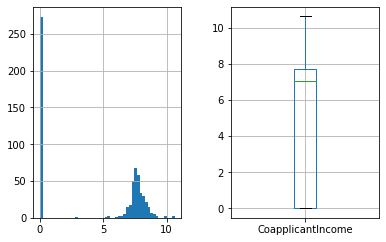

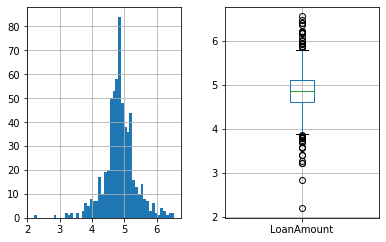

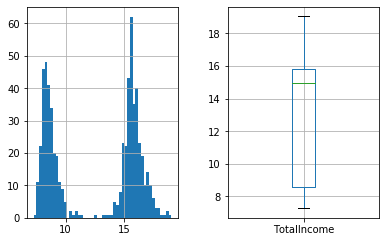

In [121]:
for continuous in continuous_variables: 
    plt.subplot(1, 2, 1);
    train[continuous].hist(bins=50);
    plt.subplot(1, 2, 2);
    train.boxplot(column=[continuous]);
    plt.tight_layout(pad=3.0)
    plt.show()

In [122]:
train = pd.get_dummies(train, columns=['Gender'])

In [123]:
train.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Gender_Female,Gender_Male
0,LP001002,No,0,Graduate,No,8.674026,0.000000,4.852030,360.0,1.0,Urban,Y,8.674026,0,1
1,LP001003,Yes,1,Graduate,No,8.430109,7.319202,4.852030,360.0,1.0,Rural,N,15.749312,0,1
2,LP001005,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,360.0,1.0,Urban,Y,8.006368,0,1
3,LP001006,Yes,0,Not Graduate,No,7.856707,7.765993,4.787492,360.0,1.0,Urban,Y,15.622700,0,1
4,LP001008,No,0,Graduate,No,8.699515,0.000000,4.948760,360.0,1.0,Urban,Y,8.699515,0,1


## Prediction

In [124]:
features = continuous_variables
target = ['Loan_Status']

In [125]:
features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome']

In [131]:
X = np.array(train[features])
y = np.array(train[target])

In [132]:
model = LogisticRegression(random_state=0)

In [133]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
X[:1,:].shape

(1, 4)

In [135]:
X.shape

(614, 4)

In [136]:
model.predict(X[:10,:])

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [137]:
model.predict_proba(X[:10,:])

array([[0.34387567, 0.65612433],
       [0.26590885, 0.73409115],
       [0.3274956 , 0.6725044 ],
       [0.29260178, 0.70739822],
       [0.35168489, 0.64831511],
       [0.308337  , 0.691663  ],
       [0.28382581, 0.71617419],
       [0.30621441, 0.69378559],
       [0.2991079 , 0.7008921 ],
       [0.26261133, 0.73738867]])

In [138]:
model.score(X, y)

0.6905537459283387